# Customer demographic

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
file_path = 'C:/Users/ASUS/Documents/Prwatech Project work/Customer_Retail_Transaction_Dataset.xlsx'


In [3]:
# Load the Excel file
sheets = pd.ExcelFile(file_path).sheet_names


In [4]:
# Load all sheets into dataframes
data = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in sheets}

In [5]:
# Check sheet names and data
for sheet_name, df in data.items():
    print(f"Sheet: {sheet_name}, Shape: {df.shape}")
    display(df.head())

Sheet: Transactions, Shape: (20000, 13)


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


Sheet: NewCustomerList, Shape: (1000, 23)


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.95,1.1875,1.484375,1.261719,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,1.02,1.0200,1.275000,1.083750,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.73,0.7300,0.730000,0.730000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.00,1.2500,1.250000,1.250000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,1.00,1.0000,1.250000,1.250000,4,4,1.703125


Sheet: CustomerDemographic, Shape: (4000, 12)


,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,U,71,NaN,124.0,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaN,124.0,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaN,124.0,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaN,124.0,Senior Sales Associate,IT,Mass Customer,N,No,NaN


Sheet: CustomerAddress, Shape: (3999, 6)


,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


# Customer Demographic 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [7]:
cust_demo = pd.read_excel(r"C:\Users\ASUS\Documents\Prwatech Project work\Customer_Retail_Transaction_Dataset.xlsx" , sheet_name='CustomerDemographic')

In [8]:
cust_demo.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,U,71,NaN,124.0,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaN,124.0,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaN,124.0,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaN,124.0,Senior Sales Associate,IT,Mass Customer,N,No,NaN


In [9]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   name                                 4000 non-null   object 
 2   gender                               4000 non-null   object 
 3   past_3_years_bike_related_purchases  4000 non-null   int64  
 4   DOB                                  3913 non-null   object 
 5   age                                  3999 non-null   float64
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

In [10]:
# Total Records

In [11]:
cust_demo.shape

(4000, 12)

In [12]:
print("Total records (rows) in the dataset : {}".format(cust_demo.shape[0]))
print("Total columns (features) in the dataset : {}".format(cust_demo.shape[1]))

Total records (rows) in the dataset : 4000
Total columns (features) in the dataset : 12


In [13]:
# Numeric Columns and Non-Numeric Columns

In [14]:
# select numeric columns
df_numeric = cust_demo.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are : {}".format(numeric_cols))


# select non-numeric columns
df_non_numeric = cust_demo.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are : {}".format(non_numeric_cols))

The numeric columns are : ['customer_id' 'past_3_years_bike_related_purchases' 'age' 'tenure']
The non-numeric columns are : ['name' 'gender' 'DOB' 'job_title' 'job_industry_category'
 'wealth_segment' 'deceased_indicator' 'owns_car']


In [15]:
# Missing Values Check

In [16]:
# Total number of missing values

cust_demo.isnull().sum()

customer_id                              0
name                                     0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
age                                      1
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [17]:
# Percentage of missing values

cust_demo.isnull().mean()*100

customer_id                             0.000
name                                    0.000
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
age                                     0.025
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
dtype: float64

In [18]:
# Date of Birth

In [19]:
cust_demo[cust_demo['DOB'].isnull()].head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,144,Jory Barrabeale,U,71,NaN,124.0,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaN,124.0,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaN,124.0,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaN,124.0,Senior Sales Associate,IT,Mass Customer,N,No,NaN
5,451,Marlow Flowerdew,U,37,NaN,124.0,Quality Control Specialist,IT,High Net Worth,N,No,NaN


In [20]:
round(cust_demo['DOB'].isnull().mean()*100)

2

In [21]:
# Since less than 5 % of data has null date of birth. we can remove the records where date of birth is null.

In [22]:
dob_index_drop = cust_demo[cust_demo['DOB'].isnull()].index
dob_index_drop

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87],
      dtype='int64')

In [23]:
cust_demo.drop(index=dob_index_drop, inplace=True, axis=0)

In [24]:
cust_demo['DOB'].isnull().sum()

0

# Creating Age Column for checking further descripency in data


In [25]:
from datetime import date

# Define the age calculation function
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

# Convert the 'DOB' column to datetime format
cust_demo['DOB'] = pd.to_datetime(cust_demo['DOB'], errors='coerce')

# Apply the age function to the 'DOB' column
cust_demo['Age'] = cust_demo['DOB'].apply(age)


<Axes: xlabel='Age'>

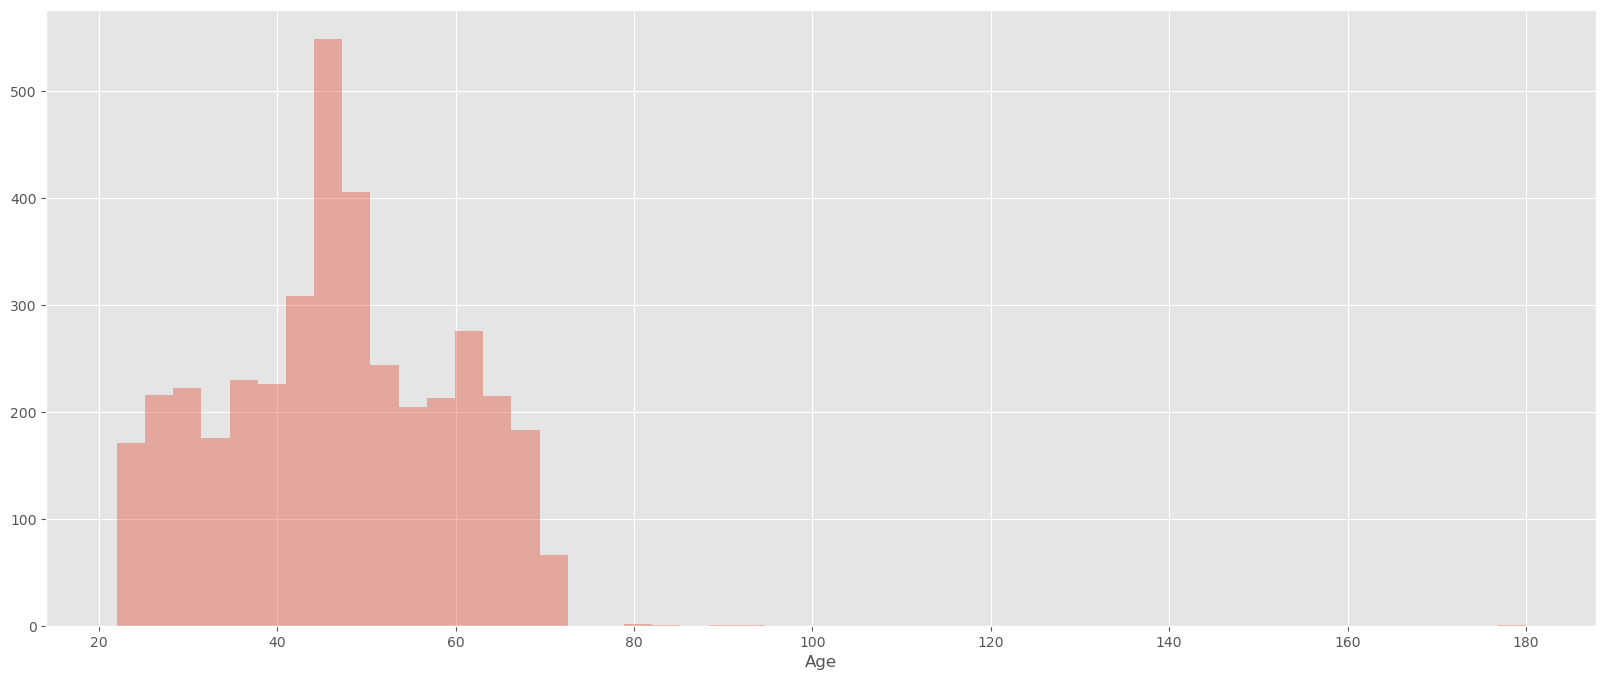

In [26]:
# find out the Age Distribution
plt.figure(figsize=(20,8))
sns.distplot(cust_demo['Age'], kde=False, bins=50)

In [27]:
cust_demo['Age'].describe()


count    3913.000000
mean       46.707386
std        12.802115
min        22.000000
25%        37.000000
50%        47.000000
75%        56.000000
max       180.000000
Name: Age, dtype: float64

Here we find there is only 1 customer with an age of 180. Clearly this is an outlier since the 75th percentile of Age is 53

In [28]:
cust_demo[cust_demo['Age'] > 100]

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,No,20.0,180


Here we see a customer with age 180 which is an outlier. hence we need to remove this record.

In [29]:
age_index_drop = cust_demo[cust_demo['Age']>100].index

cust_demo.drop(index=age_index_drop, inplace=True , axis=0)

In [30]:
# Tenure

When Date of Birth was Null the Tenure was also Null. Hence after removing null DOBs from dataframe , null tenures were also removed.

In [31]:
cust_demo['tenure'].isnull().sum()

0

There are no missing values for Tenure column.

In [32]:
# Job Title

In [33]:
# Fetching records where Job Title is missing.

cust_demo[cust_demo['job_title'].isnull()].head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
90,3410,Merrili Brittin,Female,93,1940-09-22,83.0,NaN,Property,Mass Customer,N,No,16.0,84
95,11,Uriah Bisatt,Male,99,1954-04-30,70.0,NaN,Property,Mass Customer,N,No,9.0,70
116,2208,Lavena Embling,Female,59,1954-05-07,70.0,NaN,NaN,Mass Customer,N,No,9.0,70
137,3806,Ado Gailor,Male,1,1954-02-08,70.0,NaN,Property,Mass Customer,N,No,7.0,70
155,691,Carver Carwardine,Male,29,1954-08-25,70.0,NaN,Financial Services,Affluent Customer,N,Yes,5.0,70


Since Percentage of missing Job is 13. We will replace null values with Missing.

In [34]:
cust_demo['job_title'].fillna('Missing', inplace=True, axis=0)

In [35]:
cust_demo['job_title'].isnull().sum()

0

Currently there are no mssing values for job_title column.

In [36]:
# Job Industry Category

In [37]:
cust_demo[cust_demo['job_industry_category'].isnull()].head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
97,187,Pincas Ather,Male,97,1954-01-28,70.0,Structural Engineer,NaN,Mass Customer,N,No,11.0,70
116,2208,Lavena Embling,Female,59,1954-05-07,70.0,Missing,NaN,Mass Customer,N,No,9.0,70
117,2283,Gaspar Janaway,Male,44,1954-02-08,70.0,Software Consultant,NaN,High Net Worth,N,No,16.0,70
127,3100,Peggy Wrankling,Female,19,1954-02-09,70.0,Recruiter,NaN,Mass Customer,N,No,7.0,70
129,3259,Rabi,Male,74,1953-11-04,70.0,Quality Control Specialist,NaN,High Net Worth,N,No,10.0,70


Since Percentage of missing Job Industry Category is 16. We will replace null values with Missing

In [38]:
cust_demo['job_industry_category'].fillna('Missing', inplace=True, axis=0)

In [39]:
cust_demo['job_industry_category'].isnull().sum()

0

There are no Missing Values in the dataset.

In [40]:
cust_demo.isnull().sum()

customer_id                            0
name                                   0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
age                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Age                                    0
dtype: int64

In [41]:
print("Total records after removing Missing Values: {}".format(cust_demo.shape[0]))

Total records after removing Missing Values: 3912


In [42]:
# Inconsistency Check in Data

We will check whether there is inconsistent data / typo error data is present in the categorical columns.
The columns to be checked are 'gender', 'wealth_segment' ,'deceased_indicator', 'owns_car'

In [43]:
#  Gender

In [44]:
cust_demo['gender'].value_counts()

gender
Female    2039
Male      1873
Name: count, dtype: int64

Here there are inconsistent data in gender column.There are spelling mistakes and typos. For gender with value M will be replaced with Male, F will be replaced by Female and Femal will be replaced by Female

In [45]:
def replace_gender_names(gender):
    
    # Making Gender as Male and Female as standards
    if gender=='M':
        return 'Male'
    elif gender=='F':
        return 'Female'
    elif gender=='Femal':
        return 'Female'
    else :
        return gender

cust_demo['gender'] = cust_demo['gender'].apply(replace_gender_names)

In [46]:
cust_demo['gender'].value_counts()

gender
Female    2039
Male      1873
Name: count, dtype: int64

In [47]:
# Wealth Segment

There is no inconsistent data in wealth_segment column.

In [48]:
cust_demo['wealth_segment'].value_counts()

wealth_segment
Mass Customer        1954
High Net Worth        996
Affluent Customer     962
Name: count, dtype: int64

In [49]:
# Deceased Indicator

There is no inconsistent data in deceased_indicator column.

In [50]:
cust_demo['deceased_indicator'].value_counts()

deceased_indicator
N    3910
Y       2
Name: count, dtype: int64

In [51]:
# Owns a Car

In [52]:
# There is no inconsistent data in owns_car column.

In [53]:
cust_demo['owns_car'].value_counts()

owns_car
Yes    1974
No     1938
Name: count, dtype: int64

In [54]:
# Duplication Checks

In [55]:
cust_demo_dedupped = cust_demo.drop('customer_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(cust_demo_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(cust_demo.shape[0]))

Number of records after removing customer_id (pk), duplicates : 3912
Number of records in original dataset : 3912


# Exporting the Cleaned Customer Demographic Data Set to csv

In [56]:
# cust_demo.to_csv('Data_Cleaned/CustomerDemographic_Cleaned.csv', index=False)

In [58]:
cust_demo

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
88,720,Darrel Canet,Male,67,1931-10-23,92.0,Recruiting Manager,Retail,Affluent Customer,N,No,6.0,92
89,1092,Katlin Creddon,Female,56,1935-08-22,89.0,VP Quality Control,Retail,Mass Customer,N,No,5.0,89
90,3410,Merrili Brittin,Female,93,1940-09-22,83.0,Missing,Property,Mass Customer,N,No,16.0,84
91,658,Donn Bonnell,Male,38,1944-01-24,80.0,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8.0,80
92,2413,Abbey Murrow,Male,27,1943-08-11,81.0,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17.0,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2858,Benedicto Radki,Male,4,2002-01-09,22.0,Recruiting Manager,Missing,Mass Customer,N,Yes,1.0,22
3996,3173,Angelo,Male,55,2001-10-10,22.0,Computer Systems Analyst I,Health,Mass Customer,N,Yes,1.0,22
3997,3435,Stevena Allcock,Female,80,2002-01-15,22.0,Senior Editor,Missing,Affluent Customer,N,No,1.0,22
3998,3949,Costa Sleightholm,Male,24,2001-12-19,22.0,Web Designer IV,Manufacturing,High Net Worth,N,Yes,1.0,22
